# CUSTOMER SEGMENTATION USING MACHINE LEARNING

This notebook looks into using various python-based machine leaning and data science libraries to build a machine learning model capable of
segmenting customers using Clustering algorithms such as K-Means or Hierarchical clustering

In order to achieve this, the following steps will be followed:
 1. Data Collection and Preparation
 2. Design the DataWarehouse
     * Schema Design
     * Database Creation(this is done on PgAdmin4(postgresql)
 3. ETL Process(Extract, Transform, Load)
     * Extract data from source system
     * Transform data( -Cleaning ie handling missing values, duplicates, and outliers
                       -Normalisation)
     * Load data into the Data Warehouse
 4. OLAP Operations: This will include the following
     * Roll-Up
     * Drill-Down
     * Slicing and Dicing
     * What-if Analysis
     * Pivot(rotate)
     * Trend Analysis
 5. Clustering Analysis
     * Preprocessing
        - Normalise data for clustering
        - Apply K-Means or Hierarchical Clutering
            
 6. Visualization of Clusters
 7. Develop Strategies for Personalized Financial services based on customer segment

## ETL Process

### Extracting Data from the temporal Data store preparing it for transformation

In [9]:
import pandas as pd
Dim_Branch = pd.read_csv("Data_Sets/Dim_Branch.csv")
Dim_Employee = pd.read_csv("Data_Sets/Dim_Employee.csv")
Dim_Governance_Topic = pd.read_csv("Data_Sets/Dim_Governance_Topic.csv")
Dim_Loan_Application = pd.read_csv("Data_Sets/Dim_Loan_Application.csv")
Dim_Product = pd.read_csv("Data_Sets/Dim_Product.csv")
Dim_Region = pd.read_csv("Data_Sets/Dim_Region.csv")
Dim_Customer = pd.read_csv("Data_Sets/Dim_Customer.csv")
Fact_Transaction = pd.read_csv("Data_Sets/Fact_Transaction.csv")
Final_Dim_Account = pd.read_csv("Data_Sets/Final_Dim_Account.csv")

### Data Transformation ( Performing Exploratory Data Analysis)

This involve
1. Data Cleaning
    * Handling missing values if any
    * duplicates
    * Removing Outliers

In [4]:
Dim_Branch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   branch_id       100 non-null    object
 1   branch_name     100 non-null    object
 2   region          100 non-null    object
 3   branch_manager  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [3]:
Dim_Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  500 non-null    object
 1   name         500 non-null    object
 2   region       500 non-null    object
 3   position     500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [5]:
Dim_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10000 non-null  object
 1   name                10000 non-null  object
 2   age                 10000 non-null  int64 
 3   gender              10000 non-null  object
 4   region              10000 non-null  object
 5   preferred_language  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [6]:
Fact_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    200000 non-null  object 
 1   user_id           200000 non-null  object 
 2   region            200000 non-null  object 
 3   transaction_date  200000 non-null  object 
 4   amount            200000 non-null  float64
 5   transaction_type  200000 non-null  object 
 6   currency          200000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.7+ MB


In [7]:
Dim_Governance_Topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   topic_id    100 non-null    object
 1   topic_name  100 non-null    object
 2   mentions    100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [8]:
Dim_Loan_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  10000 non-null  object 
 1   user_id         10000 non-null  object 
 2   region          10000 non-null  object 
 3   loan_amount     10000 non-null  float64
 4   status          10000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [9]:
Dim_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     50 non-null     object 
 1   product_name   50 non-null     object 
 2   product_type   50 non-null     object 
 3   interest_rate  50 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.7+ KB


In [10]:
Dim_Region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_id    10 non-null     object
 1   region_name  10 non-null     object
 2   population   10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [11]:
Final_Dim_Account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    10000 non-null  object 
 1   user_id       10000 non-null  object 
 2   account_type  10000 non-null  object 
 3   balance       10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


## Check if there are Duplicates

In [2]:
import pandas as pd

# List of DataFrames to check
dataframes = {
    "Final_Dim_Account": Final_Dim_Account,
    "Dim_Branch": Dim_Branch,
    "Dim_Employee": Dim_Employee,
    "Dim_Governance_Topic": Dim_Governance_Topic,
    "Dim_Loan_Application": Dim_Loan_Application,
    "Dim_Product": Dim_Product,
    "Dim_Region": Dim_Region,
    "Dim_Customer": Dim_Customer,
    "Fact_Transaction": Fact_Transaction
}

def check_for_duplicates(dataframes):
    """
    Function to check for duplicates in each DataFrame.
    
    Parameters:
    - dataframes: A dictionary of DataFrame names and their corresponding DataFrames.
    
    Prints the result for each DataFrame.
    """
    for name, df in dataframes.items():
        duplicates = df[df.duplicated()]
        if not duplicates.empty:
            print(f" {name} has {len(duplicates)} duplicate rows.")
        else:
            print(f" {name} has no duplicate rows.")

# Call the function
check_for_duplicates(dataframes)

 Final_Dim_Account has no duplicate rows.
 Dim_Branch has no duplicate rows.
 Dim_Employee has no duplicate rows.
 Dim_Governance_Topic has no duplicate rows.
 Dim_Loan_Application has no duplicate rows.
 Dim_Product has no duplicate rows.
 Dim_Region has no duplicate rows.
 Dim_Customer has no duplicate rows.
 Fact_Transaction has no duplicate rows.


## Load Data into DataWarehouse

In [1]:
from sqlalchemy import create_engine
import pandas as pd

### Setup Postgre Connection Details

In [2]:
HOST = "localhost"          
DATABASE = "Microfinance_DW"  
USER = "postgres" 
PASSWORD = "bojes"
PORT = "5432"  
CONNECT_TIMEOUT = 10
SSLMODE = "prefer"

### Create Database engine

In [3]:
# Create a connection string
connection_string = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}?connect_timeout={CONNECT_TIMEOUT}&sslmode={SSLMODE}"

# Create the engine
engine = create_engine(connection_string)

# Test the connection
try:
    with engine.connect() as connection:
        print("Connection to the PostgreSQL database established successfully.")
except Exception as e:
    print(f" Failed to connect to the database: {e}")


Connection to the PostgreSQL database established successfully.


### SQL queries to create tables

In [ ]:
# Create the Fact_Transaction table
CREATE_Fact_Transaction = """
CREATE TABLE IF NOT EXISTS Fact_Transaction (
    Transaction_id VARCHAR(255) PRIMARY KEY,
    User_id VARCHAR(255) NOT NULL,
    Region INT NOT NULL,
    Transaction_date DATE NOT NULL,
    Amount DECIMAL(15, 2) NOT NULL,
    Transaction_type VARCHAR(50) NOT NULL,
    Currency VARCHAR(10) NOT NULL,
    FOREIGN KEY (User_id) REFERENCES Dim_Customer(User_id)
);
"""

# Create the Dim_Region table
CREATE_Dim_Region = """
CREATE TABLE IF NOT EXISTS Dim_Region (
    Region_id VARCHAR(255) PRIMARY KEY,
    Region_name VARCHAR(100) NOT NULL,
    Population INT NOT NULL
);
"""

# Create the Dim_Product table
CREATE_Dim_Product = """
CREATE TABLE IF NOT EXISTS Dim_Product (
    Product_id VARCHAR(255) PRIMARY KEY,
    Product_name VARCHAR(100) NOT NULL,
    Product_type VARCHAR(50) NOT NULL,
    Interest_rate DECIMAL(5, 2) NOT NULL
);
"""

# Create the Dim_Loan_Application table
CREATE_Dim_Loan_Application = """
CREATE TABLE IF NOT EXISTS Dim_Loan_Apllication (
    Application_id VARCHAR(255) PRIMARY KEY,
    User_id INT NOT NULL,
    Region INT NOT NULL,
    Loan_amount DECIMAL(15, 2) NOT NULL,
    Status VARCHAR(50) NOT NULL,
    FOREIGN KEY (User_id) REFERENCES Dim_Customer(User_id)
);
"""

# Create the Dim_Governance_Topic table
CREATE_Dim_Governance_Topic = """ 
CREATE TABLE IF NOT EXISTS Dim_Governance_Topic (
    Topic_id VARCHAR(255) PRIMARY KEY,
    Topic_name VARCHAR(100) NOT NULL,
    Mentions INT NOT NULL
);
"""

# Create the Dim_Employee table
CREATE_Dim_Employee = """
CREATE TABLE IF NOT EXISTS Dim_Employee (
    Employee_id VARCHAR(255) PRIMARY KEY,
    Name VARCHAR(100) NOT NULL,
    Region INT NOT NULL,
    Position VARCHAR(50) NOT NULL
);
"""

# Create the Dim_Customer table
CREATE_Dim_Customer = """ 
CREATE TABLE IF NOT EXISTS Dim_Customer (
    User_id VARCHAR(255) PRIMARY KEY,
    Name VARCHAR(100) NOT NULL,
    Age INT NOT NULL,
    Gender VARCHAR(10) NOT NULL,
    Region INT NOT NULL,
    Preferred_language VARCHAR(50) NOT NULL
);
"""

# Create the Dim_Branch table
CREATE_Dim_Branch = """
CREATE TABLE IF NOT EXISTS Dim_Branch (
    Branch_id VARCHAR(255) PRIMARY KEY,
    Branch_name VARCHAR(100) NOT NULL,
    Region INT NOT NULL,
    Branch_manager VARCHAR(100) NOT NULL,
);
"""

--# Create the Dim_Account table
CREATE_Dim_Account """ 
CREATE TABLE IF NOT EXISTS Dim_Account (
    Account_id VARCHAR(255) PRIMARY KEY,
    User_id VARCHAR(255) NOT NULL,
    Account_type VARCHAR(50) NOT NULL,
    Balance DECIMAL(15, 2) NOT NULL,
    FOREIGN KEY (User_id) REFERENCES Dim_Customer(User_id)
);
"""


In [ ]:
dataframes = {
    'dim_account': Final_Dim_Account,
    'dim_branch': Dim_Branch,
    'dim_employee': Dim_Employee,
    'dim_governance_topic': Dim_Governance_Topic,
    'dim_loan_application': Dim_Loan_Application,
    'dim_product': Dim_Product,
    'dim_region': Dim_Region,
    'dim_customer': Dim_Customer,
    'fact_transaction': Fact_Transaction
}

for table_name, df in dataframes.items():
    try:
        df.to_sql(table_name, con=engine, if_exists='append', index=False)
        print(f"✅ Data inserted into '{table_name}' successfully.")
    except Exception as e:
        # Check for specific exceptions related to existing data
        if "duplicate" in str(e).lower() or "already exists" in str(e).lower():
            print(f"✅ Data already present in '{table_name}'.")
        else:
            print(f"❌ Error inserting data into '{table_name}': {e}")


✅ Data already present in 'dim_account'.
✅ Data already present in 'dim_branch'.
✅ Data already present in 'dim_employee'.
✅ Data already present in 'dim_governance_topic'.
✅ Data already present in 'dim_loan_application'.
✅ Data already present in 'dim_product'.
✅ Data already present in 'dim_region'.
✅ Data already present in 'dim_customer'.
✅ Data already present in 'fact_transaction'.


In [19]:
query = "SELECT * FROM Dim_Customer LIMIT 5;"
result = pd.read_sql(query, engine)
print(result)


                                user_id             name  age  gender  \
0  6fdf0496-c47e-4df3-9dcc-244ba842fcac    Vincent Lucas   52  Female   
1  2fafa013-678f-4693-bada-ceda476279df  Kimberly Garcia   46  Female   
2  4195d464-2ed9-4302-81a0-08c96dbf0ead      Jean Masson   32    Male   
3  57a03ec0-6327-4cb8-b08a-da5f2076d1b7    Gina Chambers   69    Male   
4  b8702e2d-3b60-4745-bf92-844836bb0ed8    Michael Bates   43  Female   

       region preferred_language  
0      Center            English  
1  North West             French  
2      Center             Pidgin  
3  North West            English  
4    Littoral            English  


## Performing OLAP(Online Analytical Processes) Operations

Online Analytical Processing (OLAP) operations is based on the multidimensional data model. It allows
managers, and analysts to get an insight of the information through fast, consistent, and interactive
access to information. Bellow are some of the OLAP operations that will be performed with respect to our project:

1. Roll-Up
2. Drill-Down
3. Slicing and Dicing
4. Pivot(rotate)
5. Trend Analysis
6. What-if Analysis

### 1. Roll-Up Operation

The Roll-Up refers to the process of aggregating data by climbing up a hierarchy or reducing the level of detail in the analysis. 
This operation allows users to summarize detailed data into higher-level insights, making it easier to identify trends, patterns, 
and overall performance.

It has the following key features:
  * `Aggregation`: which combines data points into a single summary value, typically calculated using methods such as sum, average, or count.
  * `hierarchy Navigation`: which involves navigating up a predefined hierarchy in a dimension.
  * `Reduction of Details`: By reducing the granularity(that is the level of details or depth of data withis the dataset) of the data,
     the roll-up operation allows for a more overall view, making it easier to identify large-scale trends and anomalies(patterns that deviate significantly from the expected behavior or norm within a dataset).
     However, this also means losing some of the detailed information available at a lower granularity.

why is this operation performed?

   * To analyze data at a summarized level, such as understanding total sales, revenue, or transactions in a specific region or time period.
   * It reduces complexity and highlights overarching patterns that are crucial for strategic planning.
       
Example Application:
In a financial institution, aggregating transaction amounts by region can reveal which regions generate the highest revenue, guiding resource allocation or marketing strategies.

Performed On: Fact_transaction

Contains transactional data that can be aggregated over dimensions like region, transaction_date, or transaction type.

In [22]:
# Aggregating the transaction amounts by region to find the total revenue per region
roll_up_result = Fact_Transaction.groupby("region").agg(  
    amount=("amount", "sum"),  
    transaction_date=("transaction_date", "min"),  
    transaction_type=("transaction_type", lambda x: x.mode()[0])  
).reset_index()

# Setting the display format for better readability  
pd.set_option('display.float_format', '{:.2f}'.format)  

# Sorting the result to identify which regions generate the highest revenue
roll_up_result = roll_up_result.sort_values(by="amount", ascending=False)

# Resetting the index so that it is sequential  
roll_up_result.reset_index(drop=True, inplace=True) 

# Print the aggregated and sorted results
display(roll_up_result)

# Identify the region with the highest revenue  
highest_revenue_row = roll_up_result.iloc[0]  # Get the first row, which has the highest revenue  
highest_region = highest_revenue_row['region']  
highest_amount = highest_revenue_row['amount']  
first_date = highest_revenue_row['transaction_date']  
most_frequent_type = highest_revenue_row['transaction_type']  

# Print an f-string indicating which region has the highest revenue  
print(f"The region with the highest revenue is {highest_region} with an amount of {highest_amount:.2f}.")  
print(f"First transaction date: {first_date} and most frequent transaction type: {most_frequent_type}.")  

,region,amount,transaction_date,transaction_type
0,East,5053640114.45,2019-12-14,Loan Disbursement
1,South West,5044148811.91,2019-12-14,Deposit
2,Far North,5040775082.63,2019-12-14,Deposit
3,Littoral,5025186515.48,2019-12-14,Loan Repayment
4,Center,5019888106.46,2019-12-14,Deposit
5,South,5019656148.58,2019-12-14,Loan Disbursement
6,West,5000292187.35,2019-12-14,Withdrawal
7,Adamawa,4999974451.37,2019-12-14,Loan Disbursement
8,North,4990456542.34,2019-12-14,Loan Repayment
9,North West,4943756851.37,2019-12-14,Loan Repayment


The region with the highest revenue is East with an amount of 5053640114.45.
First transaction date: 2019-12-14 and most frequent transaction type: Loan Disbursement.


### 2. Drill-Down

Purpose:
Drill-Down explores detailed data, allowing deeper insights into the underlying causes of trends or patterns observed at higher levels.

Why it's Performed:

  * To investigate anomalies, such as why transactions in a particular region are low.
  * Enables granular analysis, such as viewing individual transactions or customer details in a specific region.

Example Application:

   * If a region shows unexpectedly low transaction volumes, drilling down to individual transactions can identify specific issues, such as customer inactivity or branch inefficiency.

Performed On: Fact_transaction

Provides the granular data needed for deeper analysis, including transaction types, regions, and amounts.

In [23]:
# Drill-Down: Filter data for 'North' region
drill_down_result = Fact_Transaction[Fact_Transaction["region"] == "North"]
display(drill_down_result)

,transaction_id,user_id,region,transaction_date,amount,transaction_type,currency
72,07437b71-9f33-4907-b20d-511f235e21ad,e7a2c88f-4e87-47e1-915e-9f82e73798cd,North,2024-04-24,379969.37,Deposit,XAF
87,70be028e-9522-4df5-8afd-8ab11653e5f2,62580bf4-18f6-4ae1-8cd1-dfe4355baf77,North,2021-02-24,443820.79,Loan Repayment,XAF
92,fbaf4230-d774-4dbd-9565-b56ba30a4bdc,c2d40e1c-af1d-4ba3-b565-b0898b5214b9,North,2022-08-28,113634.19,Loan Disbursement,XAF
93,36e14932-1366-4201-82c2-f70e1c39452a,e09b9402-f213-429e-b6dd-bdadc24033b7,North,2023-11-07,375134.66,Loan Repayment,XAF
99,21759e2c-e3a9-45e7-b60a-6b4ea92985f7,015f6c60-60ab-4719-863d-626d715c0566,North,2024-05-16,52586.64,Loan Disbursement,XAF
...,...,...,...,...,...,...,...
199953,c3a04b3b-26bd-482b-99e3-249c647232cf,5ee56edf-0636-4546-ab61-87c9c28eea74,North,2024-08-09,327892.15,Deposit,XAF
199957,3d32ec21-a08d-4bf3-83db-bcf2f4b69589,3660a5d5-a141-4547-ab23-e57709dcc0e2,North,2021-02-13,254334.49,Loan Repayment,XAF
199979,79bbb554-4b54-4011-ac92-acf302636ff3,3ece7530-57c7-4572-978a-97f220ba62e4,North,2021-01-14,56390.19,Loan Disbursement,XAF
199988,2c986d71-ac9a-4513-ba98-a3d70fe7207c,215ed6a9-47d0-4335-80f6-3a6e8d9dae4b,North,2024-11-16,471400.95,Withdrawal,XAF


### Slicing and Dicing

Purpose:
Slicing isolates specific subsets of data, while Dicing analyzes data from multiple perspectives to answer specific questions.

Why it's Performed:

  * To filter data for a targeted analysis, such as focusing on customers from a specific region or age group.
  * Useful for identifying market segments or evaluating performance in different demographics or geographies.
      
Example Application:

   * Slicing: Selecting customers from the "North" region to understand their behavior.
   * Dicing: Analyzing male customers aged 30–40 in the "South" region to assess loan preferences.
   
Performed On: Dim_Customer

Contains demographic details that enable segmentation and targeted analysis.

In [24]:
# **Slicing**: Selecting customers from the "North" region
sliced_data = Dim_Customer[Dim_Customer["region"] == "North"]
print("Sliced Data (Customers from the North region):")
display(sliced_data)


Sliced Data (Customers from the North region):


,user_id,name,age,gender,region,preferred_language
39,d22cb724-6caf-4e10-82d2-68eba74e5345,Danielle Rey,30,Female,North,English
40,d0d21336-3be8-465b-be65-70348f9cfed5,William Gautier,52,Female,North,Pidgin
41,5a06726c-af90-42ef-916f-02fd977ab441,Roland Leclercq,43,Female,North,English
64,51fcfeed-3f92-42cb-a6b7-cf630e98873b,Jeannine Moreau Le Marty,20,Male,North,Pidgin
117,3ee7444f-6963-4aa9-8f01-9cb05ced53bc,Isabelle Lévêque de la Étienne,48,Male,North,English
...,...,...,...,...,...,...
9755,365bdc6e-4fb5-44df-9a20-7a6a3f6debf3,Christiane Le Pichon,37,Female,North,French
9790,8c97a6da-55ba-4a05-b257-0cd24b7bf4f5,Matthieu de Le Roux,66,Female,North,Pidgin
9827,f96a542e-3bc1-4369-ab5d-dbd318402fe2,Lisa Mcfarland,18,Female,North,Pidgin
9830,7c13329f-471e-4e7c-af2e-fcce3953fe0c,Gary Cook,32,Female,North,English


In [25]:
#Dicing
# Join Dim_Customer and Dim_Loan_Application on User_id
import pandas as pd

# SQL query
query = """
SELECT 
    dc.User_id,
    dc.Name,
    dc.Age,
    dc.Gender,
    dc.Region,
    dc.Preferred_language,
    dla.Application_id,
    dla.Loan_amount,
    dla.Status
FROM 
    Dim_Customer AS dc
JOIN 
    Dim_Loan_Application AS dla
ON 
    dc.User_id = dla.User_id
WHERE 
    dc.Region = 'South' AND
    dc.Gender = 'Male' AND
    dc.Age BETWEEN 30 AND 40;
"""

# Execute the query and load the result into a DataFrame
diced_data = pd.read_sql(query, connection_string)

# Display the result
print("Diced Data:")
display(diced_data)



Diced Data:


,user_id,name,age,gender,region,preferred_language,application_id,loan_amount,status
0,54c80898-6762-4251-b5a3-60aca05a8c7b,Sandra Larson,38,Male,South,English,e42780d6-2e6a-46cc-a807-49340ed9f29f,787281.64,Pending
1,ba6e33a3-12d5-49d5-90e2-b1834f91d45e,Mrs. Ashley Ward,35,Male,South,English,d018ff09-d7a7-4f9c-ad36-b25e7eff4e48,992203.81,Rejected
2,5cae8e8b-6cbb-4390-8de5-aaef46d608a8,Dylan Smith,37,Male,South,French,11e5d216-3895-494d-8afb-65ed324ceeb8,283822.78,Approved
3,b8e44b19-e0f2-481b-8187-3b74efb6aa08,Andrew Carr,31,Male,South,French,2e691cfa-aa07-44f9-bd15-b81799ed75e0,198611.24,Pending
4,5ce167e2-c65c-4515-9b05-a7e48e0e8330,Christiane Fischer,36,Male,South,Pidgin,8a0356c0-6a73-4df0-b8ec-ce184f608286,269155.39,Pending
5,bdb8cb1e-1df8-4eae-b459-95f521737cc5,Hugues Laporte de Laroche,39,Male,South,French,5fa7d699-4ecf-43fd-b308-f3ab373e8c21,313336.22,Approved
6,de8c6382-cb66-40ca-a7a0-2f0808649ac5,Paulette de Besnard,39,Male,South,English,5cb64b39-bb70-423f-b475-c11dc1d37d8c,970365.96,Pending
7,8b5f68de-b697-4f2c-b8d9-15e551a306e0,Taylor Hickman,37,Male,South,Pidgin,d442e1cc-5915-4aad-b33b-cdee466d2354,504913.72,Rejected
8,91b1835d-f46d-4200-bb49-7d05bc969b73,Vincent du Gillet,37,Male,South,Pidgin,0292ed63-d295-4dfb-a534-684cc3eb5342,367858.04,Pending
9,bed76580-11a3-433c-9889-47c7773c251b,Jérôme-René David,32,Male,South,English,e08190b5-0c99-4b17-9198-e55ed066cf57,471004.29,Rejected


### Pivot

Purpose:
Pivoting reorganizes data to view it from different perspectives, making it easier to compare attributes and spot relationships.

Why it's Performed:

  * To understand how different attributes interact, such as interest rates across product types.
  * Helps visualize complex relationships in a simplified tabular format.
      
Example Application:
      
  * Comparing the interest rates for different financial products (e.g., loans, savings, mortgages) across categories can guide product development and pricing strategies.

Performed On: Dim_Product

Contains data on financial products, making it ideal for comparing interest rates and product types.

In [26]:
import pandas as pd

# Example query to fetch data from Dim_Product table
query = """
SELECT 
    Product_id,
    Product_name,
    Product_type,
    Interest_rate
FROM 
    Dim_Product
"""

# Fetch the data from the database
df = pd.read_sql(query, connection_string)

# Pivot the table to compare Interest Rate across different Product Types
pivot_result = df.pivot_table(
    values='interest_rate',  # Column to aggregate
    index='product_name',    # Row index
    columns='product_type',  # Column to pivot
    aggfunc='mean',          # Aggregation function (mean in this case)
    fill_value=0             # Replace missing values with 0 (optional)
)

# Format the interest rates as percentages
pivot_result = pivot_result.apply(lambda x: x.map(lambda v: f"{v:.2f}%"))

# Display the pivoted result
print("Pivoted Data (Interest rates across product types):")
display(pivot_result)


Pivoted Data (Interest rates across product types):


product_type,Deposit,Loan
product_name,,
Current Account,10.95%,1.50%
Fixed Deposit,11.60%,5.58%
Microloan,11.53%,12.29%
SME Loan,14.33%,8.83%
Savings Account,12.71%,12.52%


### Trend Analysis

Purpose:
Trend Analysis examines patterns over time to identify growth, declines, or seasonal fluctuations.

Why it's Performed:

  * To detect long-term trends, such as increasing transaction volumes, seasonal spending habits, or declining loan applications.
  * Supports forecasting and proactive decision-making.
      
Example Application:
  * A trend showing increasing deposits during holiday seasons can inform marketing campaigns and resource planning.

Performed On: Fact_transaction

Includes time-series data (e.g., transaction dates and amounts) that are essential for identifying temporal patterns.

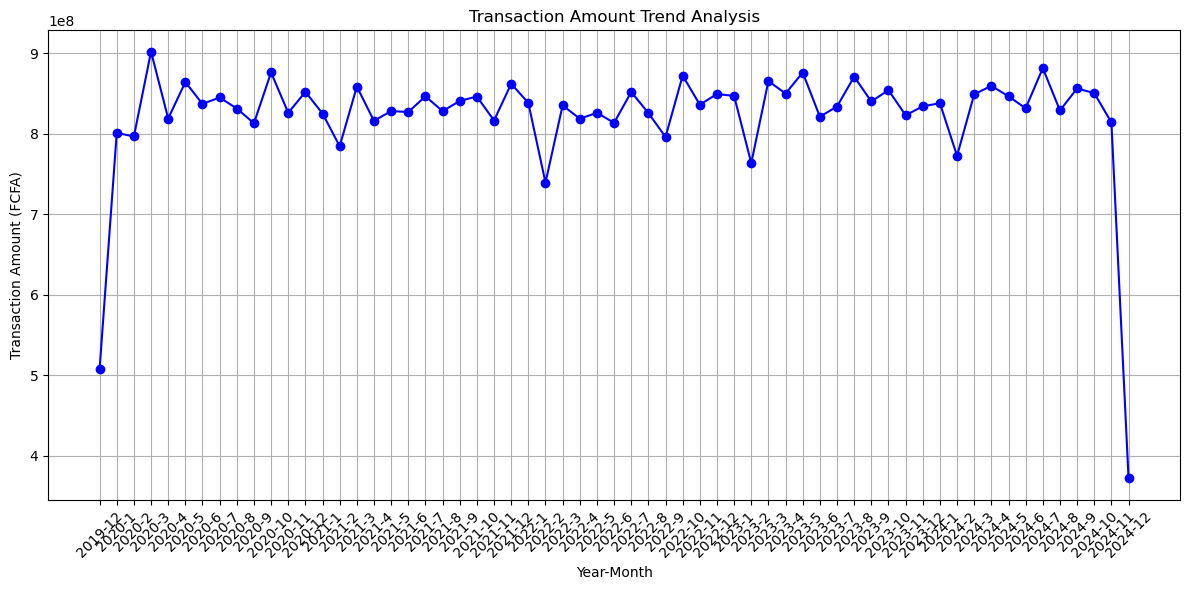

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example query to fetch transaction data from Fact_transaction table
query = """
SELECT 
    Transaction_id,
    Transaction_date,
    Amount
FROM 
    Fact_transaction
"""

# Fetch the data from the database
df = pd.read_sql(query, connection_string)

# Convert the transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract year and month for trend analysis
df['Year'] = df['transaction_date'].dt.year
df['Month'] = df['transaction_date'].dt.month

# Aggregate transaction amounts by month and year
trend_data = df.groupby(['Year', 'Month'])['amount'].sum().reset_index()

# Create a new column to combine Year and Month for easier plotting
trend_data['Year-Month'] = trend_data['Year'].astype(str) + '-' + trend_data['Month'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(trend_data['Year-Month'], trend_data['amount'], marker='o', color='b', linestyle='-', label='Transaction Amount')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Transaction Amount Trend Analysis')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Amount (FCFA)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### What-if Analysis

Purpose:
What-if Analysis explores hypothetical scenarios to predict outcomes and assess the impact of changes in variables.

Why it's Performed:

  * To evaluate the potential effects of policy changes, such as increasing interest rates or offering promotions.
  * Helps organizations simulate outcomes and make informed decisions without actual implementation.

Example Application:
  * Analyzing how a 5% increase in account balances affects overall financial health allows for risk assessment and contingency planning.

Performed On: Dim_Account

Provides financial data (e.g., balances) that can be adjusted to simulate hypothetical scenarios.

In [7]:
import pandas as pd

# Example query to fetch data from Dim_Account table
query = """
SELECT 
    Account_id,
    User_id,
    Account_type,
    Balance
FROM 
    Dim_Account
"""

# Fetch the data from the database
df = pd.read_sql(query, connection_string)

# Simulate a 5% increase in account balances (What-If Scenario)
df['Increased_balance'] = df['balance'] * 1.05  # Increase by 5%

# Calculate the change in balance
df['Balance_change'] = df['Increased_balance'] - df['balance']

# Calculate the total balances before and after the increase
total_original_balance = df['balance'].sum()
total_increased_balance = df['Increased_balance'].sum()
total_balance_change = df['Balance_change'].sum()

# Display the results
print(f"Total Original Balance: {total_original_balance:.2f}")
print(f"Total Increased Balance (5% increase): {total_increased_balance:.2f}")
print(f"Total Balance Change: {total_balance_change:.2f}")

# Show the DataFrame with the increased balances and changes
print("\nAccount Balances with 5% Increase:")
display(df[['account_id', 'user_id', 'account_type', 'balance', 'Increased_balance', 'Balance_change']])


Total Original Balance: 4992309605.52
Total Increased Balance (5% increase): 5241925085.80
Total Balance Change: 249615480.28

Account Balances with 5% Increase:


,account_id,user_id,account_type,balance,Increased_balance,Balance_change
0,b433953e-155d-4677-bb67-d67e06a56a9f,6fdf0496-c47e-4df3-9dcc-244ba842fcac,Current,70463.99,73987.1895,3523.1995
1,6c518bd8-99df-43b4-a032-47470f2a6cdf,2fafa013-678f-4693-bada-ceda476279df,Savings,928039.38,974441.3490,46401.9690
2,036b5b15-c840-4d84-9af0-ea0a3e4ef93d,4195d464-2ed9-4302-81a0-08c96dbf0ead,Fixed Deposit,218028.87,228930.3135,10901.4435
3,b59c9b57-fdde-44ce-8277-ca4c71be491a,57a03ec0-6327-4cb8-b08a-da5f2076d1b7,Fixed Deposit,697813.54,732704.2170,34890.6770
4,989316cc-a530-4789-8714-d222d9b3b75d,b8702e2d-3b60-4745-bf92-844836bb0ed8,Fixed Deposit,778733.32,817669.9860,38936.6660
...,...,...,...,...,...,...
9995,64b74659-00e3-440b-990d-7ed49c28d54e,639e24b9-a024-4e1a-ba71-3397ed8a7914,Fixed Deposit,253593.47,266273.1435,12679.6735
9996,59a3e2a4-3010-4247-8ad5-84be9c85533b,10537e86-8f35-4283-8156-c87766400376,Fixed Deposit,702183.77,737292.9585,35109.1885
9997,9a9c066e-40a7-4422-a845-1f9bf7b1a3a3,5129f3ee-70e3-45f4-9afd-092ec9845496,Current,100886.07,105930.3735,5044.3035
9998,cbdd9023-1b8c-474a-8f15-7ebdedb89f28,2ba0c2cf-9efc-40b2-9cbe-39591a86d7ec,Fixed Deposit,172921.39,181567.4595,8646.0695


## Clustering

Clustering is a machine learning and data analysis technique that involves grouping a set of objects or data points into clusters based on their similaritiesor characteristics. 
The main goal of clustering is to organize data in a way that objects in the same cluster are more similar to each other than to those in other clusters.

The following clustering algorithms will be implemented:
1. K-Means Clustering


### Applying K-Means 

K-Means clustering is an unsupervised learning algorithm that groups data points into clusters based on their characteristics.
it requires the user to specify the number of clusters, denoted as `K`

For Example: Imagine you have a bunch of marbles of different colors and you want to sort them into groups based on their colors.
K-means helps you find those groups automatically!

How Does It Work?

1. Choose the Number of Groups (K):

First, you decide how many groups (or clusters) you want to create. This number is called K. For example, if you want to sort your marbles into 3 groups, K would be 3.
    
2. Pick Initial Points:

Next, K-means randomly picks K points from your data. These points are called centroids (think of them as the center of each group).

3. Assign Items to Groups:

Each item in your data is assigned to the nearest centroid (the closest center point). For the marbles, this means each marble will go into the group of the centroid that is closest to it.

4. Update the Centroids:

After all the items are assigned to groups, new centroids are calculated. This is done by finding the average position of all the items in each group.
In the marble example, if you have multiple marbles in one group, the new centroid would be somewhere in the middle of those marbles.

5. Repeat:

Steps 3 and 4 are repeated. The algorithm keeps reassigning items to the nearest centroid and updating the centroids until the groups stabilize (i.e., items do not change groups anymore).

In [5]:
# Importing the various libraries and Algorithms
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

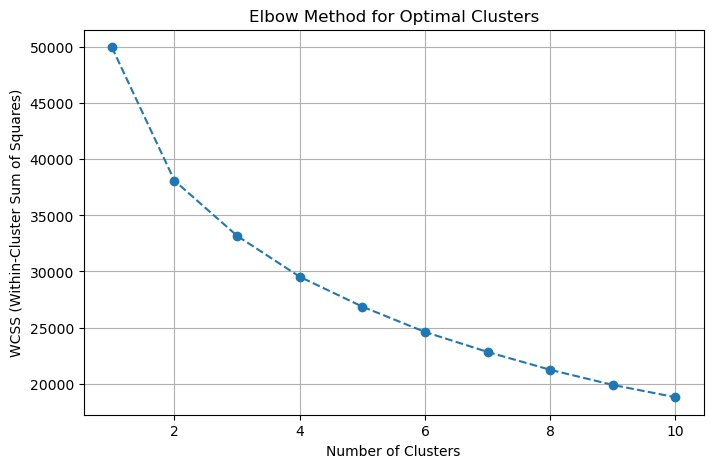

In [22]:
# Step 2: Load data using the provided query
query = """
SELECT 
    f.User_id,
    SUM(f.amount) AS total_transaction_amount,
    COUNT(f.transaction_id) AS transaction_count,
    AVG(a.balance) AS average_balance,
    c.age,
    c.region
FROM 
    Fact_transaction f
JOIN 
    Dim_Account a ON f.user_id = a.user_id
JOIN 
    Dim_Customer c ON f.user_id = c.user_id
GROUP BY 
    f.user_id, c.age, c.region;
"""
    
# Load the data into a pandas DataFrame
data = pd.read_sql(query, connection_string)
    

# Step 3: Encode the categorical variable 'Region'
label_encoder = LabelEncoder()
data['Region_Encoded'] = label_encoder.fit_transform(data['region'])

# Step 4: Select features for clustering
features = ['total_transaction_amount', 'transaction_count', 'average_balance', 'age', 'Region_Encoded']
X = data[features]

# Step 5: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()



### Explanation of the graph

From the provided graph, you can identify the optimal number of clusters (k) by locating the "elbow" point where the rate of decrease in the Within-Cluster Sum of Squares (WCSS) begins to slow down.

`Observations:`
As k increases from 2 to 10, the WCSS decreases significantly initially.
The most pronounced change occurs between 
k=2 and k=4, after which the decrease in WCSS becomes more gradual.
    
`Conclusion:`
Based on the graph, the best choice for k would likely be 4 or 5, as this is where the elbow point appears to be.
This choice balances the number of clusters with relatively low WCSS while avoiding an overly complex model with too many clusters.

# Behavioral Segmentation

Behavioral segmentation focuses on customers' actions, such as spending patterns, transaction frequency, or product usage. this approach would involve clustering customers based on:

 * Total Transaction Amount (spending behavior).
 * Transaction Count (frequency of transactions).
 * Preferred Region (indicating behavioral trends by geography).
                      
Reasons for Choosing Behavioral Segmentation:
1. Actionable Insights:
 * Behavioral patterns are closely linked to revenue. Identifying high-frequency or high-spending customers enables personalized marketing campaigns to increase loyalty.
 * Helps in detecting churn risks by identifying low-spending or low-frequency customers.
     
2. Customer Engagement:
 * Customers in the same behavioral group can receive targeted offers (e.g., discounts for frequent users or retention strategies for inactive ones).
                                                                                                                                 
3.Marketing Optimization:
 * Behavioral segmentation is crucial for improving customer engagement strategies and allocating marketing budgets effectively.


Customer data with assigned clusters:
                                user_id  Cluster
0  000dff28-f583-4aa5-8d53-5cf6fb4c05c4        1
1  000eb913-7b8c-454c-87df-13058f8cc5b2        1
2  0010644f-8f92-4b2e-8974-2f553925ceea        1
3  001703d3-e72c-4936-abf9-856beb5aae01        1
4  00191e8a-51f5-4c38-ba17-8e66f50e8a27        0


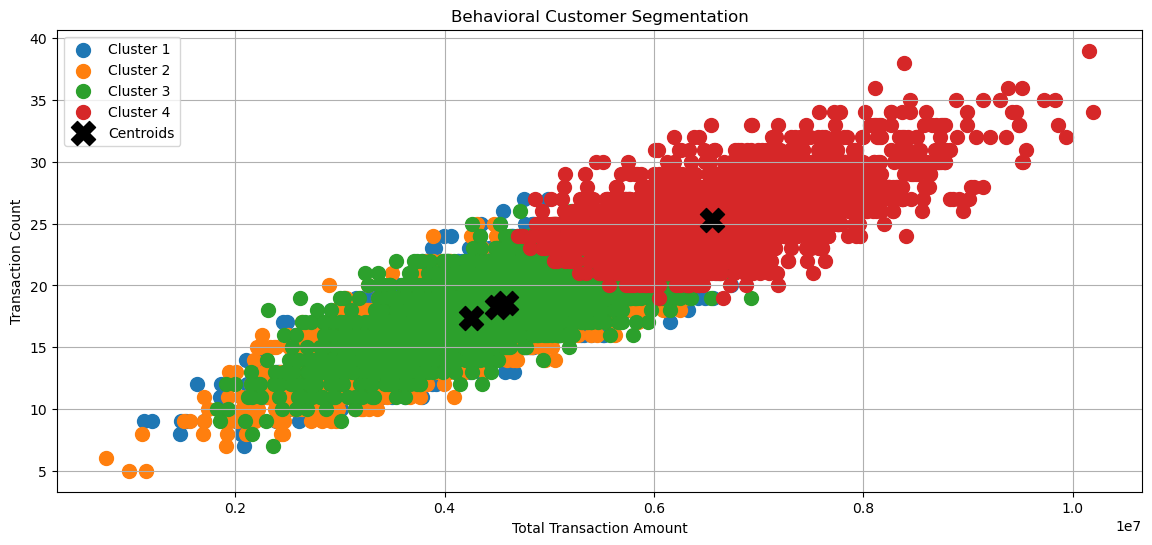

In [24]:
# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 4

# Step 7: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 8: Display the clustering results
print("\nCustomer data with assigned clusters:")
print(data[['user_id', 'Cluster']].head())

# Step 9: Visualize the clustering
plt.figure(figsize=(14, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        data[data['Cluster'] == cluster]['total_transaction_amount'],
        data[data['Cluster'] == cluster]['transaction_count'],
        s=100,
        label=f'Cluster {cluster + 1}'
    )

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    s=300, c='black', marker='X', label='Centroids'
)

plt.title('Behavioral Customer Segmentation')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Transaction Count')
plt.legend()
plt.grid()
plt.show()


#### Explanation of the Graph

The scatter plot above shows the results of customer segmentation using K-Means clustering. The data points represent individual customers, and they are grouped into 4 distinct clusters. Here's a detailed breakdown:

 `Why 4 Centroids?`

The elbow method was used to determine the optimal number of clusters (k). From the elbow plot,
4 clusters were identified as the optimal choice based on the significant drop in the WCSS (Within-Cluster Sum of Squares) and its subsequent leveling off.
This means that 4 clusters provide the best trade-off between simplicity and the ability to capture meaningful patterns in the data.
The centroids (marked with black "X") are the center points of each cluster and represent the average characteristics of all data points within each cluster. They act as the "archetypes" for each group.
    
`Cluster Interpretation:`
    
  * X-axis (Total Transaction Amount):
Represents the total monetary value of transactions performed by each customer.
Higher values on this axis indicate high-spending customers, while lower values represent lower-spending customers.
    
  * Y-axis (Transaction Count):
Represents the total number of transactions each customer performed.
Higher values on this axis represent frequent customers, while lower values indicate less frequent customers.

`Clusters:`

  * Cluster 1 (Blue): Likely represents customers with moderate spending and transaction counts.
  * Cluster 2 (Orange): Likely represents customers with low spending and transaction counts.
  * Cluster 3 (Green): Likely represents customers with moderate to high spending but relatively fewer transactions.
  * Cluster 4 (Red): Likely represents the company's top customers—those who perform high-value and frequent transactions.

`Reason for Performing Clustering:`
Clustering was performed to segment customers based on their transaction behaviors. The primary goals are:

  * Personalized Marketing:
Each cluster represents a specific group of customers with similar purchasing behaviors. For example:
Cluster 4 customers might be offered loyalty programs to retain them.
Cluster 2 customers might receive incentives to increase their engagement.

  * Resource Allocation:
The company can allocate its resources more efficiently by focusing on high-value customers or improving service for specific groups.
                                                                                                                
  * Strategic Decision-Making:
By understanding customer behavior, the company can design better products, promotions, and services to cater to different segments.

`Why This Output Makes Sense:`

  * Variability in Spending and Transactions:
Customers naturally differ in how much they spend and how frequently they transact. This is reflected in the clear separation between clusters.

  * Centroids:
The centroids act as the "average customer" for each group, highlighting the overall spending and transaction patterns for that cluster.

`Benefits to a Company:`
   * Enhanced Customer Retention: By identifying top customers (Cluster 4), the company can implement loyalty programs and personalized offers to retain them.
   * Revenue Growth: By encouraging moderate or low-value customers (Clusters 1 and 2) to increase spending or transaction frequency.
   * Better Marketing Strategies: Tailored campaigns can be created for each cluster based on their unique behaviors, ensuring better engagement and ROI (Return on Investment).

# Value-Based Segmentation

Value-based segmentation categorizes customers based on the financial value they bring to the company. In your dataset, this segmentation can be performed using:

 * Total Transaction Amount (monetary value contribution).
 * Average Balance (financial standing with the company).
                             
Reasons for Choosing Value-Based Segmentation:
1. Revenue Optimization:
 * By identifying high-value customers, the company can focus on retaining and upselling to these individuals, maximizing lifetime value.
 * Low-value customers can be encouraged to increase spending through targeted campaigns.
     
2. Resource Prioritization:
 * The company can allocate resources and marketing budgets more effectively toward high-value segments.
     
3. Customer Loyalty:
* Value-based segmentation helps identify VIP customers, enabling tailored loyalty programs to enhance satisfaction and retention.

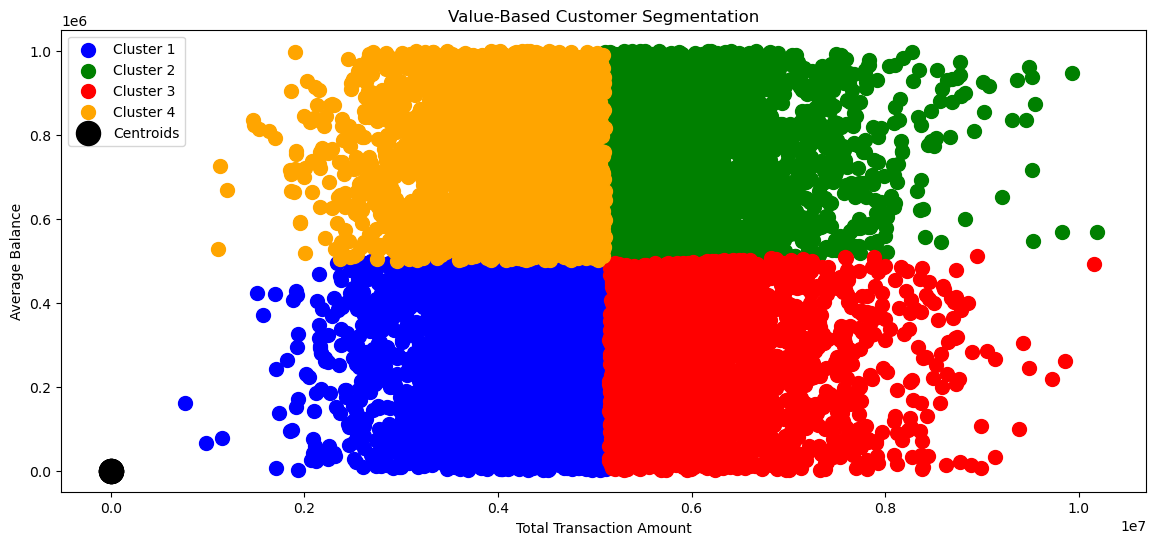

In [14]:
# Step 1: Feature Selection
features_value_based = ['total_transaction_amount', 'average_balance']

# Step 2: Data Scaling
value_based_data_scaled = scaler.fit_transform(data[features_value_based])

# Step 3: Clustering using KMeans
optimal_clusters_value_based = 4  # Based on the earlier elbow method
kmeans_value_based = KMeans(n_clusters=optimal_clusters_value_based, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Value_Cluster'] = kmeans_value_based.fit_predict(value_based_data_scaled)

# Step 4: Visualize Value-Based Clusters
plt.figure(figsize =(14,6))
plt.scatter(data[data['Value_Cluster'] == 0]['total_transaction_amount'], 
            data[data['Value_Cluster'] == 0]['average_balance'], s=100, c='blue', label='Cluster 1')
plt.scatter(data[data['Value_Cluster'] == 1]['total_transaction_amount'], 
            data[data['Value_Cluster'] == 1]['average_balance'], s=100, c='green', label='Cluster 2')
plt.scatter(data[data['Value_Cluster'] == 2]['total_transaction_amount'], 
            data[data['Value_Cluster'] == 2]['average_balance'], s=100, c='red', label='Cluster 3')
plt.scatter(data[data['Value_Cluster'] == 3]['total_transaction_amount'], 
            data[data['Value_Cluster'] == 3]['average_balance'], s=100, c='orange', label='Cluster 4')

plt.scatter(kmeans_value_based.cluster_centers_[:, 0], kmeans_value_based.cluster_centers_[:, 1], 
            s=300, c='black', label='Centroids')
plt.title('Value-Based Customer Segmentation')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Average Balance')
plt.legend()
plt.show()


### Explanation of the Graph

The output represents Value-Based Customer Segmentation, dividing customers into clusters based on their Total Transaction Amount (spending value) and Average Balance (financial resources). Here's a detailed explanation:

`Clusters Overview:`

The scatter plot divides customers into 4 distinct clusters (blue, green, red, and orange), with each cluster representing a combination of transaction value (horizontal axis) and average balance (vertical axis).
The black markers denote centroids, the central points of each cluster, summarizing the characteristics of that group.
Cluster Characteristics:

  * Cluster 1 (Blue):
Customers with low transaction amounts and low average balance.
These may be low-income or infrequent spenders who require more affordable offerings or incentives to engage more.
    
  * Cluster 2 (Green):
Customers with high transaction amounts but moderate to high average balance.
These customers are likely valuable but may be selective in their spending, requiring tailored offerings to increase engagement.
    
  * Cluster 3 (Red):
Customers with low transaction amounts but high average balance.
These are high-resource individuals who could be under-engaged. Upselling or exclusive offerings might help unlock their spending potential.
    
  * Cluster 4 (Orange):
Customers with high transaction amounts and high average balance.
These are the company's most valuable customers and should receive special attention, loyalty programs, and premium services.
    
`Benefits of Value-Based Segmentation`
    
  * Identifying High-Value Customers:
Clusters with high transaction amounts (e.g., Cluster 4) allow the company to focus resources on retaining and growing these relationships.
Providing VIP benefits, exclusive services, and rewards programs can help maintain loyalty.
    
  * Targeting Low-Value Segments:
For customers with low transaction amounts (Clusters 1 and 3), the company can design marketing strategies to encourage more spending, such as discounts, promotions, or new product offerings.
    
  * Optimizing Product/Service Offerings:
Insights from the clusters can guide product design and service offerings. For instance, premium products can target Cluster 4, while Cluster 1 might need more affordable solutions.
    
  * Efficient Resource Allocation:
The company can prioritize marketing budgets, support resources, and customer engagement activities for clusters with the highest potential value.
                                                                                                   
  * Customer Retention Strategies:
For high-balance, low-transaction customers (Cluster 3), targeted campaigns can encourage more frequent engagement.
High-balance, high-transaction customers (Cluster 4) should receive personalized retention strategies to avoid losing them to competitors.
                                                                                                   
  * Revenue Growth:
By understanding customer value, the company can drive overall revenue growth through upselling, cross-selling, and engagement-focused campaigns.
                                                                                                   
`Example Business Use Cases:`
  * Cluster 1 (Low Value):
Offer discounts or entry-level products to increase spending.
                                                                                                   
  * Cluster 2 (High Spending):
Introduce loyalty programs or bundle offers to reward consistent purchases.
                                                                                                   
  * Cluster 3 (High Balance, Low Spending):
Provide personalized recommendations or exclusive offers to encourage spending.
    
  * Cluster 4 (High Value):
Focus on retention strategies and exclusive benefits to build long-term loyalty.

Conclusion: Value-based segmentation helps the company identify, prioritize, and act on customer groups with distinct financial behaviors.
This results in improved customer experience, higher retention rates, and maximized revenue potential.

# Geographical Segmentation

`Reason for Choosing:`
  * Geographic segmentation enables the company to understand customer behavior, preferences, and requirements based on their location.
  * Useful for tailoring services, marketing campaigns, and product offerings to specific regions.
  * Helps identify underperforming regions or areas for growth.
      
`Benefits:`
  * Targeted marketing campaigns based on regional needs.
  * Optimized resource allocation (e.g., branch placement, product offerings).
  * Better customer satisfaction through localized strategies.

`Tables and Attributes for Geographic Segmentation`

1. Fact_Transaction Table:
Attributes: User_id, Region, Transaction_date, Amount
Purpose: This table provides transaction data, which is essential for understanding the spending patterns of customers in different regions.

2. Dim_Region Table:
Attributes: Region_id, Region_name, Population
Purpose: This table gives information about the geographic regions and their populations, which helps segment customers based on regional demographics and potential market size.
    
3. Dim_Customer Table:
Attributes: User_id, Region
Purpose: Links customer data (User_id) to their respective regions, allowing segmentation at a customer level.

In [16]:

# SQL Query to join tables for geographic segmentation
query = """
SELECT 
    c.user_id,
    c.region AS Customer_Region,
    r.region_name,
    r.population,
    SUM(ft.amount) AS total_transaction_amount
FROM 
    Dim_Customer c
JOIN 
    Fact_Transaction ft
ON 
    c.user_id = ft.user_id
JOIN 
    Dim_Region r
ON 
    c.region = r.region_name
GROUP BY 
    c.user_id, c.region, r.region_name, r.population;
"""



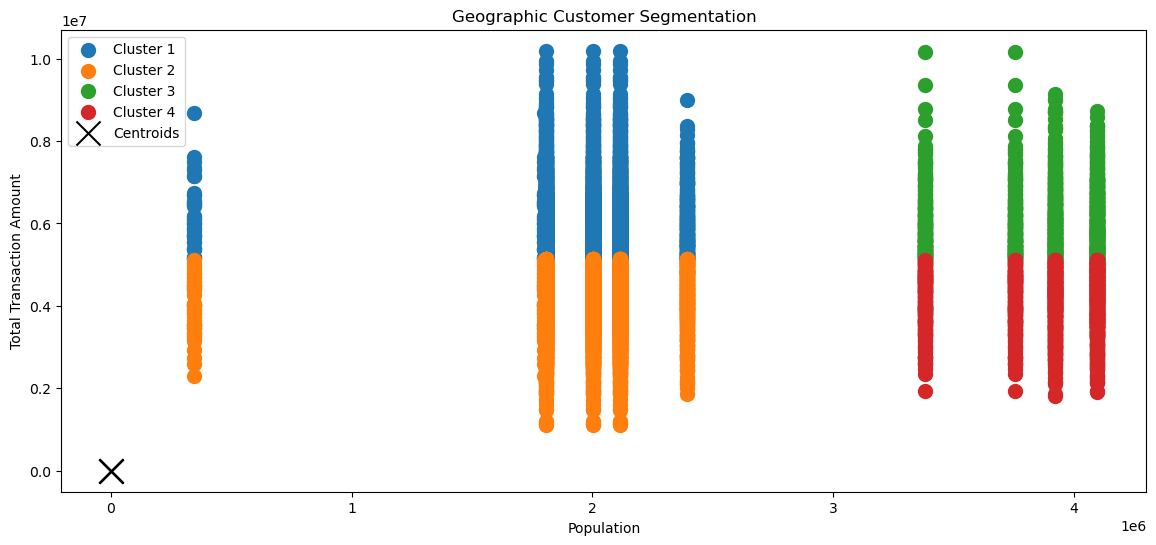

In [15]:
# Step 1: Feature Selection
features_geo = ['population', 'total_transaction_amount']

# Step 2: Data Scaling
geo_data_scaled = scaler.fit_transform(df_geo[features_geo])

# Step 3: Clustering using KMeans
optimal_clusters_geo = 4  
kmeans_geo = KMeans(n_clusters=optimal_clusters_geo, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_geo['Geo_Cluster'] = kmeans_geo.fit_predict(geo_data_scaled)

# Step 4: Visualize Geographic Segmentation Clusters
plt.figure(figsize=(14, 6))
for cluster in range(optimal_clusters_geo):
    plt.scatter(
        df_geo[df_geo['Geo_Cluster'] == cluster]['population'], 
        df_geo[df_geo['Geo_Cluster'] == cluster]['total_transaction_amount'], 
        s=100, 
        label=f'Cluster {cluster + 1}'
    )

# Plot centroids
plt.scatter(
    kmeans_geo.cluster_centers_[:, 0], 
    kmeans_geo.cluster_centers_[:, 1], 
    s=300, 
    c='black', 
    marker='x', 
    label='Centroids'
)

# Add title, labels, and legend
plt.title('Geographic Customer Segmentation')
plt.xlabel('Population')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.show()


## Explanation of the output

1. Clusters Overview:
The graph shows four distinct clusters indicated by different colors:
Cluster 1 (Blue)
Cluster 2 (Orange)
Cluster 3 (Green)
Cluster 4 (Red)
Each cluster represents a group of geographical areas characterized by their population and total transaction amount.

2. Axes:
The x-axis represents Population, showing the number of individuals in each area.
The y-axis represents the Total Transaction Amount, indicating the overall spending in that area, likely aggregated for all customers within each geographical segment.

3. Visual Distribution:
Clusters 1 and 2 (Blue and Orange): These clusters appear towards the left side of the graph, suggesting that these geographical areas have a lower population yet relatively high transaction amounts.
This could indicate affluent small communities or concentrated high-spending customers.
Clusters 3 and 4 (Green and Red): These clusters are found more toward the right side, suggesting higher population areas but with varying transaction amounts.
This could indicate larger cities where spending habits differ significantly.

4. Centroids:
The black X marks indicate the centroids of each cluster. The centroid represents the average position or the typical characteristics of the points in that cluster.
For example, the centroid may lie in a position suggesting a moderate combination of population and transaction amount.

`Benefits to a Company`
Understanding these cluster dynamics can provide various strategic advantages:

1. Targeted Marketing:

By identifying customer profiles in different geographical areas, the company can design tailored marketing campaigns.
For instance, affluent areas (Cluster 1 and 2) might receive premium product offerings, while larger cities (Cluster 3 and 4) might focus on volume promotions.

2. Resource Allocation:

Knowing where clusters exist can help the company allocate resources effectively, such as customer service, distribution centers, or localized products.
    
3. Investment Decisions:

The company can make informed decisions about where to increase investment, whether it be in marketing, opening new stores, or enhancing online services based on customer potential in particular regions.
    
4. Customer Retention:

Understanding geographic behavior enables companies to enhance customer engagement and retention strategies, ensuring that customers' needs are met based on their local demographics.
    
`Strategies for Improving Personalized Financial Services`

1. Customized Financial Products:

Tailor financial products such as loans, credit cards, or investment plans based on the typical spending behaviors and income levels observed in each cluster.
For instance, communities with higher average transactions could be targeted with premium credit offerings.

2. Localized Financial Education:

Providing localized workshops or online content tailored to the needs of different customer groups can significantly enhance engagement.
For instance, financial literacy programs could be developed based on the economic demographics of the clusters.

3. Targeted Communication:

Deploy communication strategies that resonate with specific clusters. For example, using localized language or addressing unique community financial issues helps to forge a stronger connection.

4. Data-Driven Insights:

Continuously analyze transaction data to refine customer segmentation strategies, allowing the company to stay responsive to changes in customer behavior, needs, and economic trends.

5. Customer Feedback Loops:

Implementing feedback systems to gather customer insights can help companies adapt services more promptly.
Knowing what services are most needed or desired in certain geographic regions can foster loyalty and satisfaction.